In [22]:
from numpy import mgrid, linspace, c_, arange, mean, array
from numpy.random import uniform, seed

from sklearn.datasets import make_circles

from mpl_toolkits import mplot3d
from matplotlib.pyplot import subplots, axes, scatter, xticks


In [23]:
def make_torus_3D(n_samples=100, shuffle=True, noise=None, random_state=None,
                 factor=.8):
    """Make a large torus containing a smaller torus in 3d.

    A toy dataset to visualize clustering and classification
    algorithms.

    Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated. If odd, the inner circle will
        have one point more than the outer circle.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    factor : 0 < double < 1 (default=.8)
        Scale factor between inner and outer circle.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    """
    from numpy import pi, linspace, cos, sin, append, ones, zeros, hstack, vstack, intp
    from sklearn.utils import check_random_state, shuffle

    if factor >= 1 or factor < 0:
        raise ValueError("'factor' has to be between 0 and 1.")

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    co, ao, ci, ai = 3, 1, 3.6, 0.2
    generator = check_random_state(random_state)
    # to not have the first point = last point, we set endpoint=False
    linspace_out = linspace(0, 2 * pi, n_samples_out, endpoint=False)
    linspace_in  = linspace(0, 2 * pi, n_samples_in,  endpoint=False)
    outer_circ_x = (co+ao*cos(linspace_out)) * cos(linspace_out*61.1)
    outer_circ_y = (co+ao*cos(linspace_out)) * sin(linspace_out*61.1)
    outer_circ_z =    ao*sin(linspace_out)
    
    inner_circ_x = (ci+ai*cos(linspace_in)) * cos(linspace_in*61.1)* factor
    inner_circ_y = (ci+ai*cos(linspace_in)) * sin(linspace_in*61.1) * factor
    inner_circ_z =    ai*sin(linspace_in) * factor

    X = vstack([append(outer_circ_x, inner_circ_x),
                append(outer_circ_y, inner_circ_y),
                append(outer_circ_z, inner_circ_z)]).T
            
    y = hstack([zeros(n_samples_out, dtype=intp),
                   ones(n_samples_in, dtype=intp)])
    
    
    if shuffle:
        X, y = shuffle(X, y, random_state=generator)

    if noise is not None:
        X += generator.normal(scale=noise, size=X.shape)

    return X, y


In [24]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_STATE = 12345

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}


# Assignment

Take the torus-within-a-torus data generator from the __Challenge__. 

- Create data with three features and a noise level of 0.3. 

- Create a pseudo-3D scatter plot of one of the test data sets to judge the difficulty of the task. 

- Train the above introduced classifiers using the stratified shuffle split to generate 10 sets of testing and training data and obtain the average score for each classifier.

- Plot the feature importances obtained from the Random Forest classifier to see the contributions of each feature to the outcome. 

Note that with 3 or more features it is no longer possible to see the full state space in a plane. 

- Optional: Check how the outcome varies depending on

    - Choice of seed for random number generator
    - Number of data splits
    - Percentage of data withheld for testing

__Recommended__: Pick any of the provided (or other) data sets with labels to repeat the above. 

Feel free to try and do any testing or plotting that you find important. This is not an assignment to get the correct answer. Rather at this stage, we practise to use functionality from scikit-learn to search for structure in the data that helps to achieve the best predictions possible. 


In [25]:
# Q1
seed(RANDOM_STATE)
X, y = make_torus_3D(n_samples=2000, factor=0.5, noise=0.3, random_state=RANDOM_STATE) # torus with noise level 0.3
f1, f2, f3 = 0, 1, 2 # feature variables set

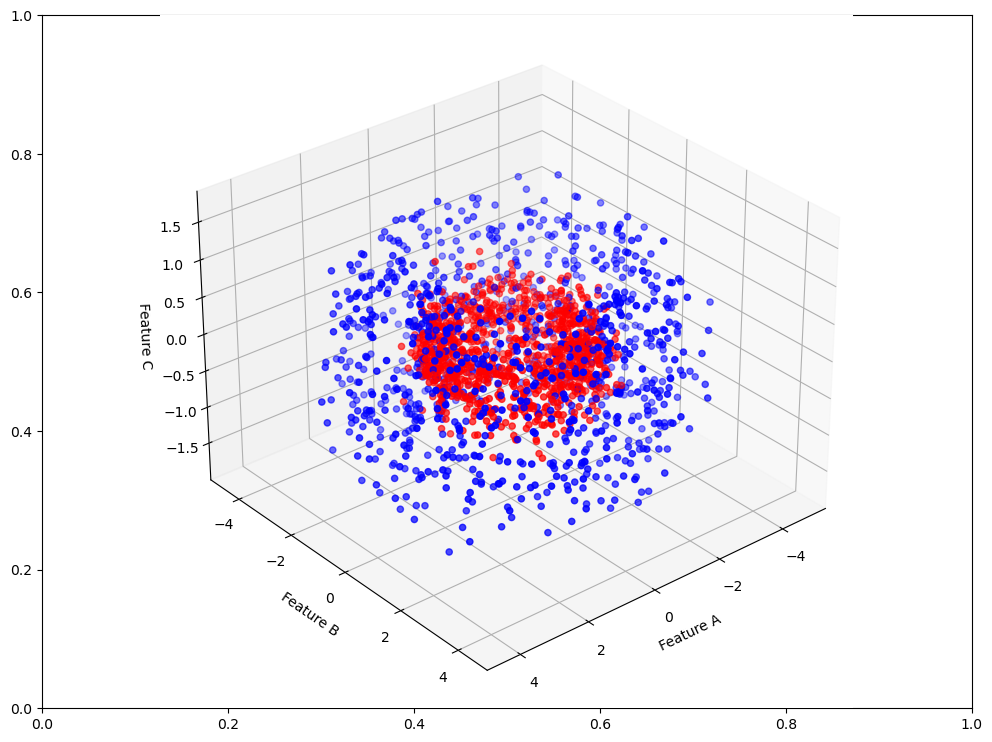

In [26]:
# Q2
fig, ax = subplots(figsize=(12, 9)) # basic plot outline
ax = axes(projection='3d') # change to 3-dimensional plot
im = ax.scatter3D(X[:, f1], X[:, f2], X[:, f3], marker='o', s=20, c=y, cmap='bwr');
ax.set_xlabel('Feature A')
ax.set_ylabel('Feature B')
ax.set_zlabel('Feature C')

ax.view_init(30, 50);

/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/baron/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/baron/anaconda3/lib/py

dict_keys(['Random Forest', 'AdaBoost (Random Forest)', 'Extra Trees', 'AdaBoost (Extra Tree)', 'Decision Tree', 'SVC (RBF)', 'SVC (Linear)', 'Multi-layer Perceptron'])
Average scores: 
['0.87', '0.87', '0.88', '0.88', '0.82', '0.89', '0.49', '0.89']
Random Forest score: 0.8583333333333333


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

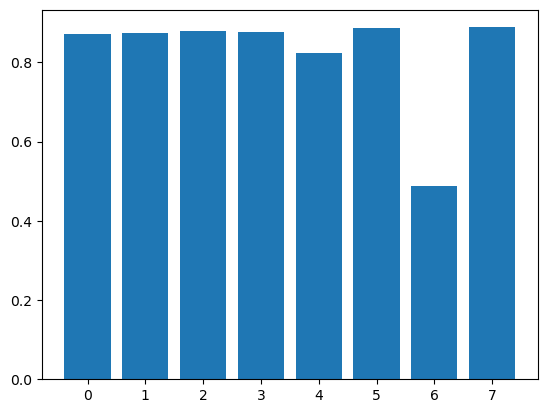

In [37]:
# Q3
shuffle = StratifiedShuffleSplit(random_state=RANDOM_STATE, n_splits=10, test_size=0.3)
split_data_indices = shuffle.split(X=X, y=y)

score = list()

for train_index, test_index in shuffle.split(X, y):
    X_s, y_s = X[train_index, :], y[train_index]
    new_obs_s, y_test_s = X[test_index, :], y[test_index]

    score_clf = list()

    for name, clf in classifiers.items():

        clf.fit(X_s, y_s)
        y_pred = clf.predict(new_obs_s)
        score_clf.append(clf.score(new_obs_s, y_test_s))

    score.append(score_clf)

score_mean = mean(score, axis=0)
bins = arange(len(score_mean))
fig, ax = subplots()
ax.bar(bins, score_mean);
print(classifiers.keys())
print('Average scores: ')
print(["{0:0.2f}".format(ind) for ind in score_mean])

clf_RF = RandomForestClassifier(random_state=RANDOM_STATE)
clf_RF.fit(X_s, y_s)
y_pred = clf_RF.predict(new_obs_s)
score_RF = clf_RF.score(new_obs_s, y_test_s)
print('Random Forest score:', score_RF)

importances = clf_RF.feature_importances_
template = 'Feature 1: {:.1f}%; Feature 2: {:.1f}%; Feature 3: {:.1f}%'
print(template.format(importances[0]*100, importances[1]*100, importances[2]*100))
bins = arange(importances.shape[0])
fig, ax = subplots()
ax.bar(bins, importances, color=('g', 'm', 'b'));
ax.set_ylabel('Feature Importance', fontsize=16)
xticks(bins, ('Feature 1', 'Feature 2', 'Feature 3'), fontsize=16);